In [177]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import datetime

print ("Modules are imported")

Modules are imported


In [178]:
#loading the training data
train = pd.read_csv("C:/Users/HP/Desktop/Minor Project/train.csv")
train_plot = pd.read_csv("C:/Users/HP/Desktop/Minor Project/train.csv")

#Shape of dataframe
print(" Shape of training dataframe: ", train.shape)
train.head(10)

 Shape of training dataframe:  (233154, 41)


,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,...,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-1984,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-1985,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-1985,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-1993,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-1977,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1
5,518279,54513,61900,89.66,67,22807,45,1501,08-09-1990,Self employed,...,0,0,1347,0,0,0,1yrs 9mon,2yrs 0mon,0,0
6,529269,46349,61500,76.42,67,22807,45,1502,01-06-1988,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
7,510278,43894,61900,71.89,67,22807,45,1501,04-10-1989,Salaried,...,0,0,0,0,0,0,0yrs 2mon,0yrs 2mon,0,0
8,490213,53713,61973,89.56,67,22807,45,1497,15-11-1991,Self employed,...,0,0,0,0,0,0,4yrs 8mon,4yrs 8mon,1,0
9,510980,52603,61300,86.95,67,22807,45,1492,01-06-1968,Salaried,...,0,0,2608,0,0,0,1yrs 7mon,1yrs 7mon,0,0


In [179]:
# Drop duplicates
train.drop_duplicates()
print(train.shape)

(233154, 41)


In [180]:
print("Names of columns ", list(train.columns))
train.info()

Names of columns  ['UNIQUEID', 'DISBURSED_AMOUNT', 'ASSET_COST', 'LTV', 'BRANCH_ID', 'SUPPLIER_ID', 'MANUFACTURER_ID', 'CURRENT_PINCODE_ID', 'DATE_OF_BIRTH', 'EMPLOYMENT_TYPE', 'DISBURSAL_DATE', 'STATE_ID', 'EMPLOYEE_CODE_ID', 'MOBILENO_AVL_FLAG', 'AADHAR_FLAG', 'PAN_FLAG', 'VOTERID_FLAG', 'DRIVING_FLAG', 'PASSPORT_FLAG', 'PERFORM_CNS_SCORE', 'PERFORM_CNS_SCORE_DESCRIPTION', 'PRI_NO_OF_ACCTS', 'PRI_ACTIVE_ACCTS', 'PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS', 'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT', 'SEC_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT', 'NEW_ACCTS_IN_LAST_SIX_MONTHS', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH', 'NO_OF_INQUIRIES', 'LOAN_DEFAULT']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count

In [181]:
#Missing values check
missing_var= train.isna().sum()  
#Number of Missing Values under each Column
print(missing_var) 

UNIQUEID                                  0
DISBURSED_AMOUNT                          0
ASSET_COST                                0
LTV                                       0
BRANCH_ID                                 0
SUPPLIER_ID                               0
MANUFACTURER_ID                           0
CURRENT_PINCODE_ID                        0
DATE_OF_BIRTH                             0
EMPLOYMENT_TYPE                        7661
DISBURSAL_DATE                            0
STATE_ID                                  0
EMPLOYEE_CODE_ID                          0
MOBILENO_AVL_FLAG                         0
AADHAR_FLAG                               0
PAN_FLAG                                  0
VOTERID_FLAG                              0
DRIVING_FLAG                              0
PASSPORT_FLAG                             0
PERFORM_CNS_SCORE                         0
PERFORM_CNS_SCORE_DESCRIPTION             0
PRI_NO_OF_ACCTS                           0
PRI_ACTIVE_ACCTS                

In [182]:

train_null_unique= train.EMPLOYMENT_TYPE.unique()
print(train_null_unique)
# fill missing values
# train.EMPLOYMENT_TYPE= train.EMPLOYMENT_TYPE.fillna("Missing")
# most probable class
train.EMPLOYMENT_TYPE= train.EMPLOYMENT_TYPE.fillna("Self employed")
train_null_unique= train.EMPLOYMENT_TYPE.unique()
print(train_null_unique)

['Salaried' 'Self employed' nan]
['Salaried' 'Self employed']


In [183]:
train_null_unique= train.EMPLOYMENT_TYPE.unique()
print(train_null_unique)

['Salaried' 'Self employed']


In [184]:
#Drop Columns with Unique IDs
train.drop(['BRANCH_ID','SUPPLIER_ID','MANUFACTURER_ID','CURRENT_PINCODE_ID','EMPLOYEE_CODE_ID','STATE_ID'], axis=1, inplace=True) 
train.shape

(233154, 35)

In [185]:
train.head(10)
missing_var= train.isna().sum()  
#Number of Missing Values under each Column
print(missing_var) 

UNIQUEID                               0
DISBURSED_AMOUNT                       0
ASSET_COST                             0
LTV                                    0
DATE_OF_BIRTH                          0
EMPLOYMENT_TYPE                        0
DISBURSAL_DATE                         0
MOBILENO_AVL_FLAG                      0
AADHAR_FLAG                            0
PAN_FLAG                               0
VOTERID_FLAG                           0
DRIVING_FLAG                           0
PASSPORT_FLAG                          0
PERFORM_CNS_SCORE                      0
PERFORM_CNS_SCORE_DESCRIPTION          0
PRI_NO_OF_ACCTS                        0
PRI_ACTIVE_ACCTS                       0
PRI_OVERDUE_ACCTS                      0
PRI_CURRENT_BALANCE                    0
PRI_SANCTIONED_AMOUNT                  0
PRI_DISBURSED_AMOUNT                   0
SEC_NO_OF_ACCTS                        0
SEC_ACTIVE_ACCTS                       0
SEC_OVERDUE_ACCTS                      0
SEC_CURRENT_BALA

In [186]:
# Changing AVERAGE_ACCT_AGE & CREDIT_HISTORY_LENGTH

train[['AVERAGE_ACCT_Yr','AVERAGE_ACCT_Month']] = train['AVERAGE_ACCT_AGE'].str.split("yrs",expand=True)
train[['AVERAGE_ACCT_Month','AVERAGE_ACCT_Month1']] = train['AVERAGE_ACCT_Month'].str.split("mon",expand=True)
train["AVERAGE_ACCT_AGE"]= train["AVERAGE_ACCT_Yr"].astype(str).astype(int)+((train["AVERAGE_ACCT_Month"].astype(str).astype(int))/12)
train= train.drop(columns= ["AVERAGE_ACCT_Yr","AVERAGE_ACCT_Month",'AVERAGE_ACCT_Month1'])


train[['CREDIT_HISTORY_LENGTH_Yr','CREDIT_HISTORY_LENGTH_Month']] = train['CREDIT_HISTORY_LENGTH'].str.split("yrs",expand=True)
train[['CREDIT_HISTORY_LENGTH_Month','CREDIT_HISTORY_LENGTH_Month1']] = train['CREDIT_HISTORY_LENGTH_Month'].str.split("mon",expand=True)
train["CREDIT_HISTORY_LENGTH"]= train["CREDIT_HISTORY_LENGTH_Yr"].astype(str).astype(int)+((train["CREDIT_HISTORY_LENGTH_Month"].astype(str).astype(int))/12)
train= train.drop(columns= ["CREDIT_HISTORY_LENGTH_Yr","CREDIT_HISTORY_LENGTH_Month",'CREDIT_HISTORY_LENGTH_Month1'])


In [187]:
train.head(10)

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,DATE_OF_BIRTH,EMPLOYMENT_TYPE,DISBURSAL_DATE,MOBILENO_AVL_FLAG,AADHAR_FLAG,PAN_FLAG,...,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
0,420825,50578,58400,89.55,01-01-1984,Salaried,03-08-2018,1,1,0,...,0,0,0,0,0,0,0.000000,0.000000,0,0
1,537409,47145,65550,73.23,31-07-1985,Self employed,26-09-2018,1,1,0,...,0,0,1991,0,0,1,1.916667,1.916667,0,1
2,417566,53278,61360,89.63,24-08-1985,Self employed,01-08-2018,1,1,0,...,0,0,0,0,0,0,0.000000,0.000000,0,0
3,624493,57513,66113,88.48,30-12-1993,Self employed,26-10-2018,1,1,0,...,0,0,31,0,0,0,0.666667,1.250000,1,1
4,539055,52378,60300,88.39,09-12-1977,Self employed,26-09-2018,1,1,0,...,0,0,0,0,0,0,0.000000,0.000000,1,1
5,518279,54513,61900,89.66,08-09-1990,Self employed,19-09-2018,1,1,0,...,0,0,1347,0,0,0,1.750000,2.000000,0,0
6,529269,46349,61500,76.42,01-06-1988,Salaried,23-09-2018,1,1,0,...,0,0,0,0,0,0,0.000000,0.000000,0,0
7,510278,43894,61900,71.89,04-10-1989,Salaried,16-09-2018,1,1,0,...,0,0,0,0,0,0,0.166667,0.166667,0,0
8,490213,53713,61973,89.56,15-11-1991,Self employed,05-09-2018,1,1,0,...,0,0,0,0,0,0,4.666667,4.666667,1,0
9,510980,52603,61300,86.95,01-06-1968,Salaried,16-09-2018,1,0,0,...,0,0,2608,0,0,0,1.583333,1.583333,0,0


In [188]:
# function to calculate age in years
def from_dob_to_age(born):
    today = datetime.date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

In [189]:
# convert date to datetime object
train['DATE_OF_BIRTH'] =  pd.to_datetime(train['DATE_OF_BIRTH'], format='%d-%m-%Y')
train['DISBURSAL_DATE'] =  pd.to_datetime(train['DISBURSAL_DATE'], format='%d-%m-%Y')

In [190]:
# calculate age and disbursal time in years
train['AGE'] = train['DATE_OF_BIRTH'].apply(lambda x: from_dob_to_age(x))
train['DISBURSAL_TIME'] = train['DISBURSAL_DATE'].apply(lambda x: from_dob_to_age(x))

# drop DATE_OF_BIRTH, DISBURSAL_DATE, MOBILENO_AVL_FLAG
train= train.drop(columns= ["DATE_OF_BIRTH","DISBURSAL_DATE","MOBILENO_AVL_FLAG"])


In [191]:
train.head(10)
# train.info()

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,EMPLOYMENT_TYPE,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,DRIVING_FLAG,PASSPORT_FLAG,...,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT,AGE,DISBURSAL_TIME
0,420825,50578,58400,89.55,Salaried,1,0,0,0,0,...,0,0,0,0,0.000000,0.000000,0,0,37,2
1,537409,47145,65550,73.23,Self employed,1,0,0,0,0,...,1991,0,0,1,1.916667,1.916667,0,1,35,2
2,417566,53278,61360,89.63,Self employed,1,0,0,0,0,...,0,0,0,0,0.000000,0.000000,0,0,35,2
3,624493,57513,66113,88.48,Self employed,1,0,0,0,0,...,31,0,0,0,0.666667,1.250000,1,1,27,2
4,539055,52378,60300,88.39,Self employed,1,0,0,0,0,...,0,0,0,0,0.000000,0.000000,1,1,43,2
5,518279,54513,61900,89.66,Self employed,1,0,0,0,0,...,1347,0,0,0,1.750000,2.000000,0,0,30,2
6,529269,46349,61500,76.42,Salaried,1,0,0,0,0,...,0,0,0,0,0.000000,0.000000,0,0,32,2
7,510278,43894,61900,71.89,Salaried,1,0,0,0,0,...,0,0,0,0,0.166667,0.166667,0,0,31,2
8,490213,53713,61973,89.56,Self employed,1,0,0,0,0,...,0,0,0,0,4.666667,4.666667,1,0,29,2
9,510980,52603,61300,86.95,Salaried,0,0,1,0,0,...,2608,0,0,0,1.583333,1.583333,0,0,52,2


In [192]:
train.PERFORM_CNS_SCORE_DESCRIPTION.value_counts()

No Bureau History Available                                116950
C-Very Low Risk                                             16045
A-Very Low Risk                                             14124
D-Very Low Risk                                             11358
B-Very Low Risk                                              9201
M-Very High Risk                                             8776
F-Low Risk                                                   8485
K-High Risk                                                  8277
H-Medium Risk                                                6855
E-Low Risk                                                   5821
I-Medium Risk                                                5557
G-Low Risk                                                   3988
Not Scored: Sufficient History Not Available                 3765
J-High Risk                                                  3748
Not Scored: Not Enough Info available on the customer        3672
Not Scored

In [193]:
train = train.replace({'PERFORM_CNS_SCORE_DESCRIPTION':{'C-Very Low Risk':'Low', 'A-Very Low Risk':'Low',
                                                       'B-Very Low Risk':'Low', 'D-Very Low Risk':'Low',
                                                       'F-Low Risk':'Low', 'E-Low Risk':'Low', 'G-Low Risk':'Low',
                                                       'H-Medium Risk': 'Medium', 'I-Medium Risk': 'Medium',
                                                       'J-High Risk':'High', 'K-High Risk':'High','L-Very High Risk':'Very High',
                                                       'M-Very High Risk':'Very High','Not Scored: More than 50 active Accounts found':'Not Scored',
                                                       'Not Scored: Only a Guarantor':'Not Scored','Not Scored: Not Enough Info available on the customer':'Not Scored',
                                                        'Not Scored: No Activity seen on the customer (Inactive)':'Not Scored','Not Scored: No Updates available in last 36 months':'Not Scored',
                                                       'Not Scored: Sufficient History Not Available':'Not Scored', 'No Bureau History Available':'Not Scored'
                                                       }})

In [194]:
train.PERFORM_CNS_SCORE_DESCRIPTION.value_counts()

Not Scored    129785
Low            69022
Medium         12412
High           12025
Very High       9910
Name: PERFORM_CNS_SCORE_DESCRIPTION, dtype: int64

In [195]:
#create dummy variables
train = pd.get_dummies(train,columns=['EMPLOYMENT_TYPE','PERFORM_CNS_SCORE_DESCRIPTION'])

In [196]:
train.head(10)

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,DRIVING_FLAG,PASSPORT_FLAG,PERFORM_CNS_SCORE,...,LOAN_DEFAULT,AGE,DISBURSAL_TIME,EMPLOYMENT_TYPE_Salaried,EMPLOYMENT_TYPE_Self employed,PERFORM_CNS_SCORE_DESCRIPTION_High,PERFORM_CNS_SCORE_DESCRIPTION_Low,PERFORM_CNS_SCORE_DESCRIPTION_Medium,PERFORM_CNS_SCORE_DESCRIPTION_Not Scored,PERFORM_CNS_SCORE_DESCRIPTION_Very High
0,420825,50578,58400,89.55,1,0,0,0,0,0,...,0,37,2,1,0,0,0,0,1,0
1,537409,47145,65550,73.23,1,0,0,0,0,598,...,1,35,2,0,1,0,0,1,0,0
2,417566,53278,61360,89.63,1,0,0,0,0,0,...,0,35,2,0,1,0,0,0,1,0
3,624493,57513,66113,88.48,1,0,0,0,0,305,...,1,27,2,0,1,0,0,0,0,1
4,539055,52378,60300,88.39,1,0,0,0,0,0,...,1,43,2,0,1,0,0,0,1,0
5,518279,54513,61900,89.66,1,0,0,0,0,825,...,0,30,2,0,1,0,1,0,0,0
6,529269,46349,61500,76.42,1,0,0,0,0,0,...,0,32,2,1,0,0,0,0,1,0
7,510278,43894,61900,71.89,1,0,0,0,0,17,...,0,31,2,1,0,0,0,0,1,0
8,490213,53713,61973,89.56,1,0,0,0,0,718,...,0,29,2,0,1,0,1,0,0,0
9,510980,52603,61300,86.95,0,0,1,0,0,818,...,0,52,2,1,0,0,1,0,0,0


In [197]:
#Drop one dummy each - base category
train.drop(['EMPLOYMENT_TYPE_Self employed','PERFORM_CNS_SCORE_DESCRIPTION_Low'],axis=1,inplace=True) 

In [198]:
train.head(10)

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,DRIVING_FLAG,PASSPORT_FLAG,PERFORM_CNS_SCORE,...,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT,AGE,DISBURSAL_TIME,EMPLOYMENT_TYPE_Salaried,PERFORM_CNS_SCORE_DESCRIPTION_High,PERFORM_CNS_SCORE_DESCRIPTION_Medium,PERFORM_CNS_SCORE_DESCRIPTION_Not Scored,PERFORM_CNS_SCORE_DESCRIPTION_Very High
0,420825,50578,58400,89.55,1,0,0,0,0,0,...,0.000000,0,0,37,2,1,0,0,1,0
1,537409,47145,65550,73.23,1,0,0,0,0,598,...,1.916667,0,1,35,2,0,0,1,0,0
2,417566,53278,61360,89.63,1,0,0,0,0,0,...,0.000000,0,0,35,2,0,0,0,1,0
3,624493,57513,66113,88.48,1,0,0,0,0,305,...,1.250000,1,1,27,2,0,0,0,0,1
4,539055,52378,60300,88.39,1,0,0,0,0,0,...,0.000000,1,1,43,2,0,0,0,1,0
5,518279,54513,61900,89.66,1,0,0,0,0,825,...,2.000000,0,0,30,2,0,0,0,0,0
6,529269,46349,61500,76.42,1,0,0,0,0,0,...,0.000000,0,0,32,2,1,0,0,1,0
7,510278,43894,61900,71.89,1,0,0,0,0,17,...,0.166667,0,0,31,2,1,0,0,1,0
8,490213,53713,61973,89.56,1,0,0,0,0,718,...,4.666667,1,0,29,2,0,0,0,0,0
9,510980,52603,61300,86.95,0,0,1,0,0,818,...,1.583333,0,0,52,2,1,0,0,0,0


In [199]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 37 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   UNIQUEID                                  233154 non-null  int64  
 1   DISBURSED_AMOUNT                          233154 non-null  int64  
 2   ASSET_COST                                233154 non-null  int64  
 3   LTV                                       233154 non-null  float64
 4   AADHAR_FLAG                               233154 non-null  int64  
 5   PAN_FLAG                                  233154 non-null  int64  
 6   VOTERID_FLAG                              233154 non-null  int64  
 7   DRIVING_FLAG                              233154 non-null  int64  
 8   PASSPORT_FLAG                             233154 non-null  int64  
 9   PERFORM_CNS_SCORE                         233154 non-null  int64  
 10  PRI_NO_OF_ACCTS     

In [200]:
#Creating CSV File with the preprocessed data
train.to_csv("C:/Users/HP/Desktop/trainpreprocessed.csv",index=False) 


In [201]:
# visualizations
class_df = train.groupby('LOAN_DEFAULT').count()['UNIQUEID']

In [202]:
class_df

LOAN_DEFAULT
0    182543
1     50611
Name: UNIQUEID, dtype: int64

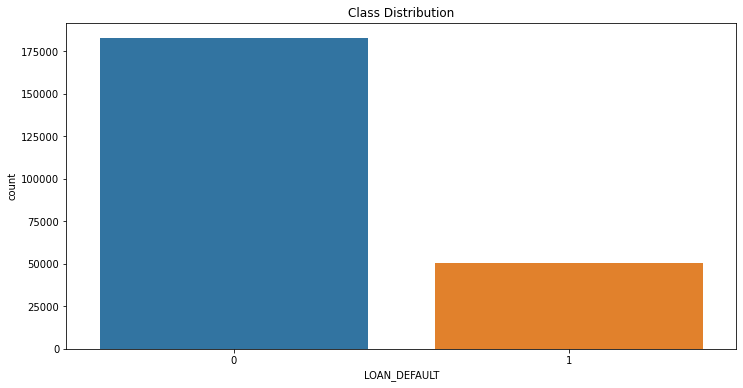

In [203]:
# class distribution
plt.figure(figsize = (12, 6))
ax = sns.countplot(x = 'LOAN_DEFAULT', data = train)
plt.title('Class Distribution')
plt.show()

In [204]:
train.describe()

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,DRIVING_FLAG,PASSPORT_FLAG,PERFORM_CNS_SCORE,...,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT,AGE,DISBURSAL_TIME,EMPLOYMENT_TYPE_Salaried,PERFORM_CNS_SCORE_DESCRIPTION_High,PERFORM_CNS_SCORE_DESCRIPTION_Medium,PERFORM_CNS_SCORE_DESCRIPTION_Not Scored,PERFORM_CNS_SCORE_DESCRIPTION_Very High
count,233154.000000,233154.000000,2.331540e+05,233154.000000,233154.00000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,...,233154.000000,233154.000000,233154.000000,233154.000000,233154.0,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000
mean,535917.573376,54356.993528,7.586507e+04,74.746530,0.84032,0.075577,0.144943,0.023242,0.002127,289.462994,...,1.354367,0.206615,0.217071,36.604296,2.0,0.419714,0.051575,0.053235,0.556649,0.042504
std,68315.693711,12971.314171,1.894478e+04,11.456636,0.36631,0.264320,0.352044,0.150672,0.046074,338.374779,...,2.381771,0.706498,0.412252,9.827552,0.0,0.493513,0.221169,0.224503,0.496782,0.201737
min,417428.000000,13320.000000,3.700000e+04,10.030000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,20.000000,2.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,476786.250000,47145.000000,6.571700e+04,68.880000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,28.000000,2.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,535978.500000,53803.000000,7.094600e+04,76.800000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,35.000000,2.0,0.000000,0.000000,0.000000,1.000000,0.000000
75%,595039.750000,60413.000000,7.920175e+04,83.670000,1.00000,0.000000,0.000000,0.000000,0.000000,678.000000,...,2.000000,0.000000,0.000000,44.000000,2.0,1.000000,0.000000,0.000000,1.000000,0.000000
max,671084.000000,990572.000000,1.628992e+06,95.000000,1.00000,1.000000,1.000000,1.000000,1.000000,890.000000,...,39.000000,36.000000,1.000000,71.000000,2.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [205]:
def plot_distribution(feature,color):
    plt.figure(figsize=(10,6))
    plt.title("Distribution of %s" % feature)
    sns.distplot(train[feature].dropna(),color=color, kde=True,bins=100)
    plt.show()

In [206]:
def plot_box(feature, color):
    plt.figure(figsize=(10,6))
    plt.title("Box Plot of %s" % feature)
    sns.boxplot(train[feature].dropna(),color=color)
    plt.show()

count    233154.000000
mean      54356.993528
std       12971.314171
min       13320.000000
25%       47145.000000
50%       53803.000000
75%       60413.000000
max      990572.000000
Name: DISBURSED_AMOUNT, dtype: float64


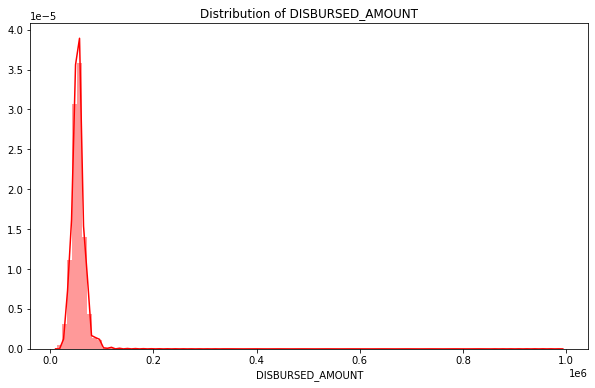

In [207]:
print(train.DISBURSED_AMOUNT.describe())
plot_distribution('DISBURSED_AMOUNT','red')

count              233154.0
mean     289.46299441570807
std       338.3747790080087
min                     0.0
25%                     0.0
50%                     0.0
75%                   678.0
max                   890.0
Name: PERFORM_CNS_SCORE, dtype: object


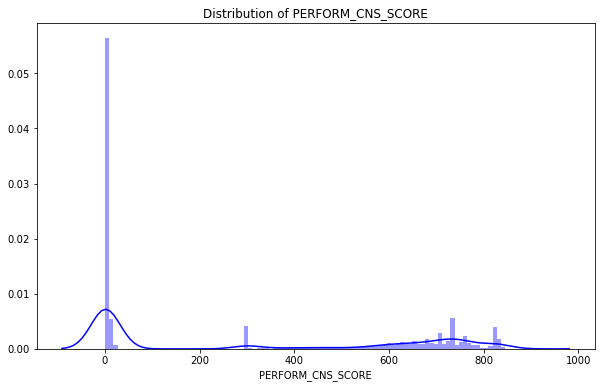

In [208]:
print(train_plot.PERFORM_CNS_SCORE.describe().astype(str))
plot_distribution('PERFORM_CNS_SCORE','blue')


In [209]:
bin_labels = ["Not scored",'Very High', "High" ,'Medium', 'low']
cut_bins = [-1,250,350,570,630, 890]

train_plot['PERFORM_CNS_SCORE_bins'] = pd.cut(train_plot['PERFORM_CNS_SCORE'],
                              bins=cut_bins,
                              labels=bin_labels)
train_plot['PERFORM_CNS_SCORE_bins'].value_counts()

Not scored    129785
low            69022
Medium         12412
High           12025
Very High       9910
Name: PERFORM_CNS_SCORE_bins, dtype: int64

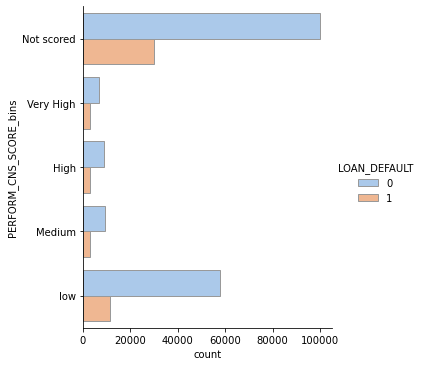

In [210]:
sns.catplot(y="PERFORM_CNS_SCORE_bins", hue="LOAN_DEFAULT", kind="count",
            palette="pastel", edgecolor=".6",
            data=train_plot);

In [211]:
def plot_bar(feature):
    plt.figure(figsize=(10,50))
    sns.catplot(y=feature, hue="LOAN_DEFAULT", kind="count",
            palette="pastel", edgecolor=".6",
            data=train_plot);

<Figure size 720x3600 with 0 Axes>

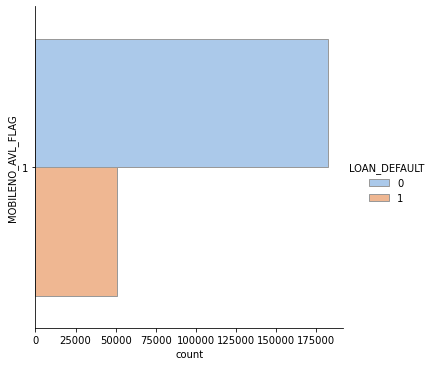

<Figure size 720x3600 with 0 Axes>

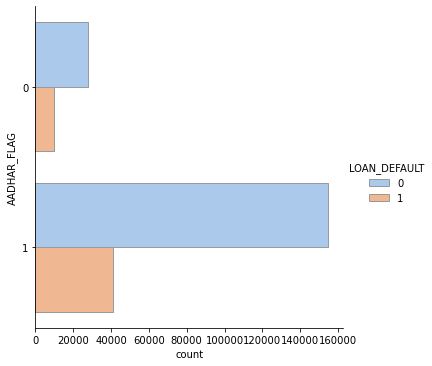

<Figure size 720x3600 with 0 Axes>

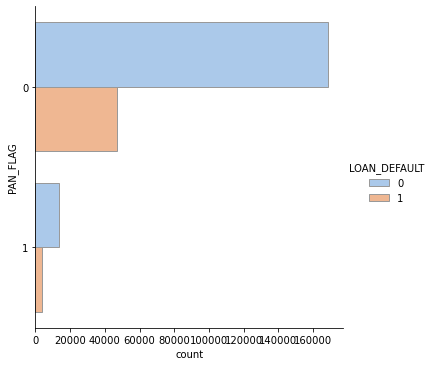

<Figure size 720x3600 with 0 Axes>

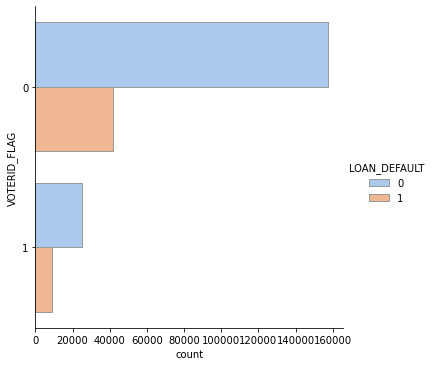

<Figure size 720x3600 with 0 Axes>

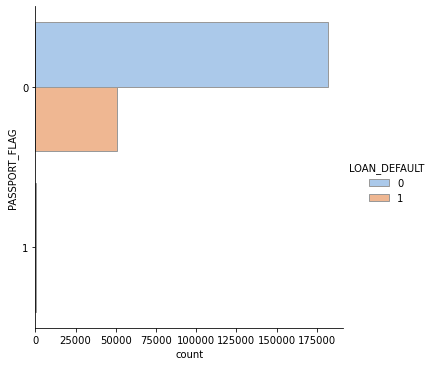

<Figure size 720x3600 with 0 Axes>

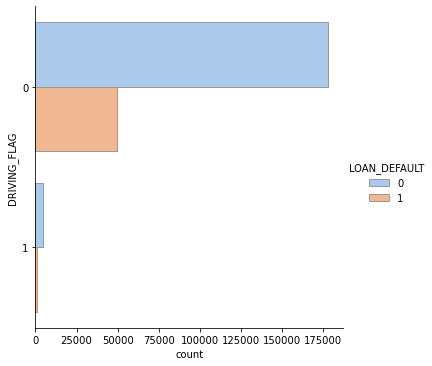

In [212]:
plot_bar("MOBILENO_AVL_FLAG")
plot_bar("AADHAR_FLAG")
plot_bar("PAN_FLAG")
plot_bar("VOTERID_FLAG")
plot_bar("PASSPORT_FLAG")
plot_bar("DRIVING_FLAG")

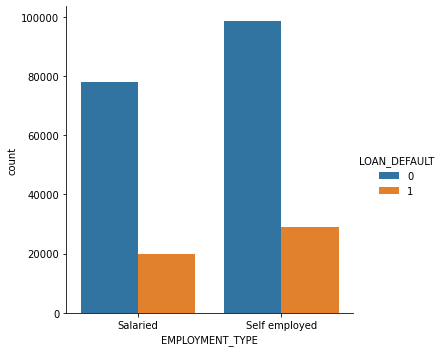

In [213]:

# Employment Type
sns.catplot(data=train_plot,kind='count',x='EMPLOYMENT_TYPE',hue='LOAN_DEFAULT')

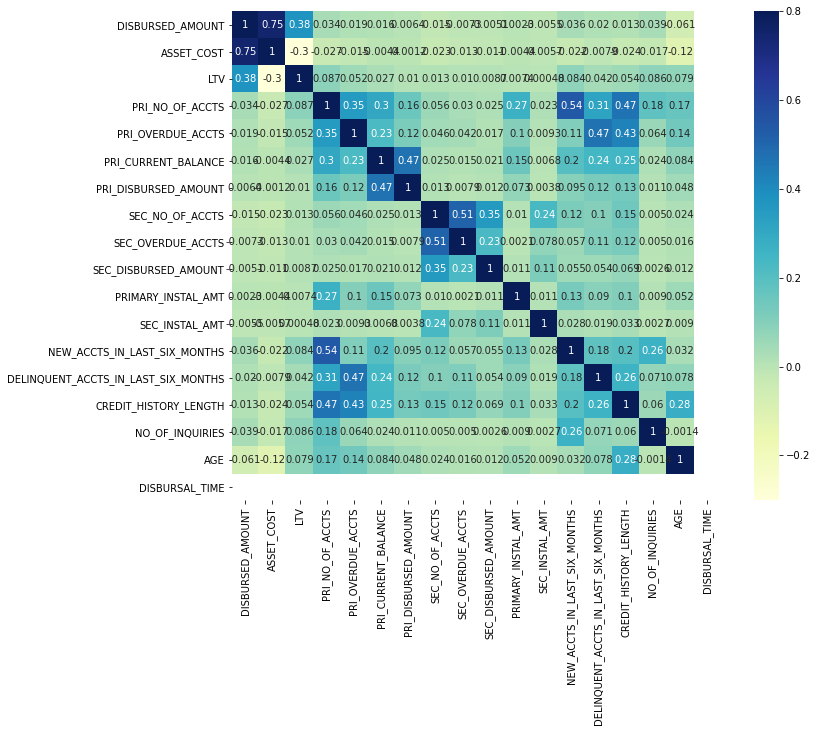

In [214]:
cols = train[['DISBURSED_AMOUNT','ASSET_COST','LTV','PRI_NO_OF_ACCTS','PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE', 'PRI_DISBURSED_AMOUNT', 
              'SEC_NO_OF_ACCTS', 'SEC_OVERDUE_ACCTS','SEC_DISBURSED_AMOUNT','PRIMARY_INSTAL_AMT','SEC_INSTAL_AMT',
              'NEW_ACCTS_IN_LAST_SIX_MONTHS','DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS'
              ,'CREDIT_HISTORY_LENGTH','NO_OF_INQUIRIES','AGE', 'DISBURSAL_TIME']]
corr = cols.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, annot=True, vmax=.8, square=True,cmap = 'YlGnBu');
                          
            

In [215]:
train1 = pd.read_csv("C:/Users/HP/Desktop/Minor Project/train.csv")
num_train = train1.select_dtypes(include=["number"])
num= num_train.drop(columns= ['UNIQUEID','PRI_ACTIVE_ACCTS','PRI_SANCTIONED_AMOUNT','SEC_CURRENT_BALANCE',
 'SEC_SANCTIONED_AMOUNT','BRANCH_ID','SUPPLIER_ID','MANUFACTURER_ID','CURRENT_PINCODE_ID',
 'STATE_ID','EMPLOYEE_CODE_ID','MOBILENO_AVL_FLAG','AADHAR_FLAG','PAN_FLAG','VOTERID_FLAG',
 'DRIVING_FLAG','PASSPORT_FLAG','PERFORM_CNS_SCORE','PRI_CURRENT_BALANCE','PRI_DISBURSED_AMOUNT',
 'SEC_NO_OF_ACCTS','SEC_ACTIVE_ACCTS','SEC_OVERDUE_ACCTS','SEC_DISBURSED_AMOUNT','PRIMARY_INSTAL_AMT','SEC_INSTAL_AMT',
 'NEW_ACCTS_IN_LAST_SIX_MONTHS','DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS','NO_OF_INQUIRIES','LOAN_DEFAULT'])
cat_train = train1.select_dtypes(exclude=["number"])

cat_train.shape


(233154, 6)

In [216]:
cat_train.head(10)

,DATE_OF_BIRTH,EMPLOYMENT_TYPE,DISBURSAL_DATE,PERFORM_CNS_SCORE_DESCRIPTION,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH
0,01-01-1984,Salaried,03-08-2018,No Bureau History Available,0yrs 0mon,0yrs 0mon
1,31-07-1985,Self employed,26-09-2018,I-Medium Risk,1yrs 11mon,1yrs 11mon
2,24-08-1985,Self employed,01-08-2018,No Bureau History Available,0yrs 0mon,0yrs 0mon
3,30-12-1993,Self employed,26-10-2018,L-Very High Risk,0yrs 8mon,1yrs 3mon
4,09-12-1977,Self employed,26-09-2018,No Bureau History Available,0yrs 0mon,0yrs 0mon
5,08-09-1990,Self employed,19-09-2018,A-Very Low Risk,1yrs 9mon,2yrs 0mon
6,01-06-1988,Salaried,23-09-2018,No Bureau History Available,0yrs 0mon,0yrs 0mon
7,04-10-1989,Salaried,16-09-2018,Not Scored: Not Enough Info available on the c...,0yrs 2mon,0yrs 2mon
8,15-11-1991,Self employed,05-09-2018,D-Very Low Risk,4yrs 8mon,4yrs 8mon
9,01-06-1968,Salaried,16-09-2018,A-Very Low Risk,1yrs 7mon,1yrs 7mon


In [217]:
num_train.head(10)

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,STATE_ID,EMPLOYEE_CODE_ID,...,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,NO_OF_INQUIRIES,LOAN_DEFAULT
0,420825,50578,58400,89.55,67,22807,45,1441,6,1998,...,0,0,0,0,0,0,0,0,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,6,1998,...,0,0,0,0,1991,0,0,1,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,6,1998,...,0,0,0,0,0,0,0,0,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,6,1998,...,0,0,0,0,31,0,0,0,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,6,1998,...,0,0,0,0,0,0,0,0,1,1
5,518279,54513,61900,89.66,67,22807,45,1501,6,1998,...,0,0,0,0,1347,0,0,0,0,0
6,529269,46349,61500,76.42,67,22807,45,1502,6,1998,...,0,0,0,0,0,0,0,0,0,0
7,510278,43894,61900,71.89,67,22807,45,1501,6,1998,...,0,0,0,0,0,0,0,0,0,0
8,490213,53713,61973,89.56,67,22807,45,1497,6,1998,...,0,0,0,0,0,0,0,0,1,0
9,510980,52603,61300,86.95,67,22807,45,1492,6,1998,...,0,0,0,0,2608,0,0,0,0,0


In [218]:
num_train.shape

(233154, 35)

In [219]:
num.head(10)

,DISBURSED_AMOUNT,ASSET_COST,LTV,PRI_NO_OF_ACCTS,PRI_OVERDUE_ACCTS
0,50578,58400,89.55,0,0
1,47145,65550,73.23,1,1
2,53278,61360,89.63,0,0
3,57513,66113,88.48,3,0
4,52378,60300,88.39,0,0
5,54513,61900,89.66,2,0
6,46349,61500,76.42,0,0
7,43894,61900,71.89,1,0
8,53713,61973,89.56,1,0
9,52603,61300,86.95,1,0


In [220]:

num.shape

(233154, 5)

In [221]:
from scipy import stats
#idx = np.all(stats.zscore(num) < 3, axis=1)
idx = (np.abs(stats.zscore(num))< 3.5).all(axis=1)

In [222]:
idx

array([ True,  True,  True, ...,  True,  True,  True])

In [223]:
train_cleaned = pd.concat([num_train.loc[idx], cat_train.loc[idx]], axis=1)

In [224]:
train_cleaned.shape

(223843, 41)

count    233154.000000
mean      54356.993528
std       12971.314171
min       13320.000000
25%       47145.000000
50%       53803.000000
75%       60413.000000
max      990572.000000
Name: DISBURSED_AMOUNT, dtype: float64


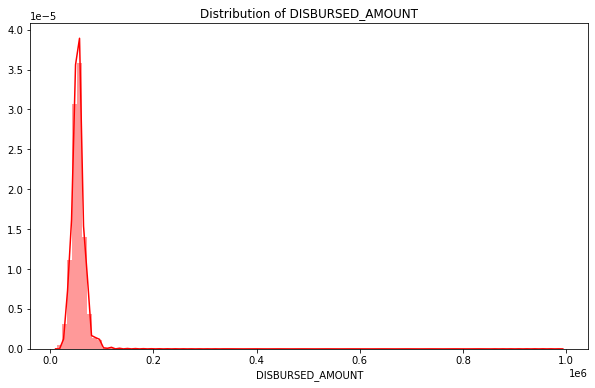

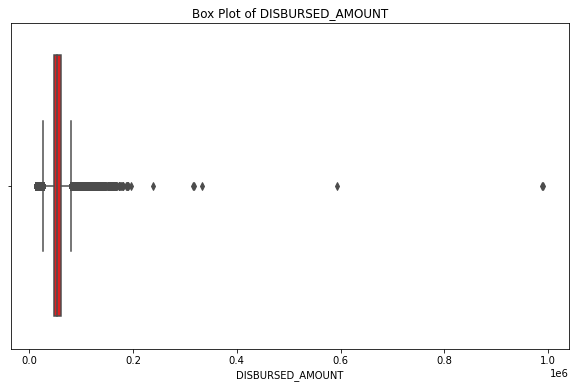

In [225]:
print(train.DISBURSED_AMOUNT.describe())
plot_distribution('DISBURSED_AMOUNT','red')
plot_box("DISBURSED_AMOUNT", "red")

count    223843.000000
mean      53840.712794
std       11202.400071
min       14119.000000
25%       47103.000000
50%       53629.000000
75%       60013.000000
max       99363.000000
Name: DISBURSED_AMOUNT, dtype: float64


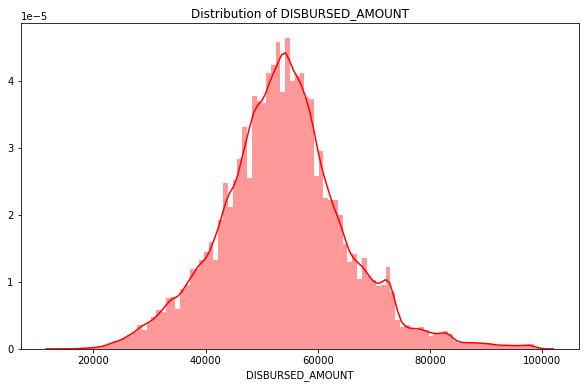

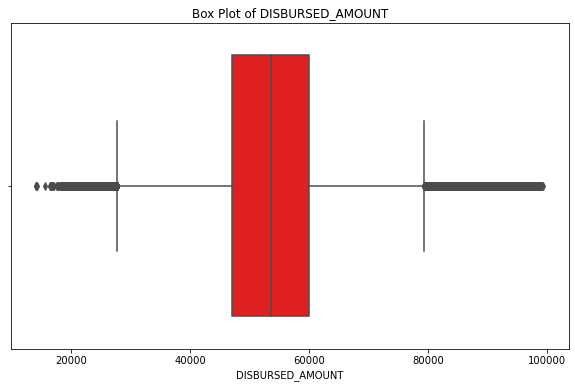

In [226]:
def plot_distribution1(feature,color):
    plt.figure(figsize=(10,6))
    plt.title("Distribution of %s" % feature)
    sns.distplot(train_cleaned[feature].dropna(),color=color, kde=True,bins=100)
    plt.show()
    
def plot_box1(feature, color):
    plt.figure(figsize=(10,6))
    plt.title("Box Plot of %s" % feature)
    sns.boxplot(train_cleaned[feature].dropna(),color=color)
    plt.show()
    
print(train_cleaned.DISBURSED_AMOUNT.describe())
plot_distribution1('DISBURSED_AMOUNT','red')
plot_box1("DISBURSED_AMOUNT", "red")

In [227]:
def plot_bar1(feature):
    plt.figure(figsize=(10,50))
    sns.catplot(y=feature, hue="LOAN_DEFAULT", kind="count",
            palette="pastel", edgecolor=".6",
            data=train_cleaned);

<Figure size 720x3600 with 0 Axes>

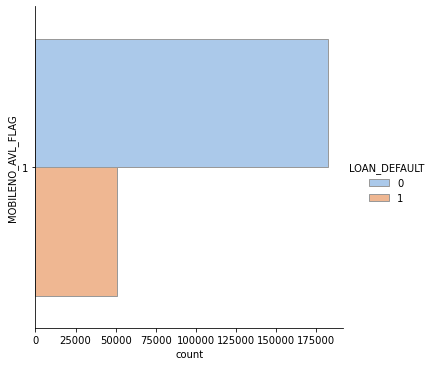

<Figure size 720x3600 with 0 Axes>

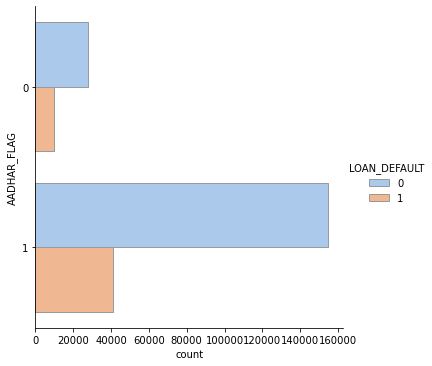

<Figure size 720x3600 with 0 Axes>

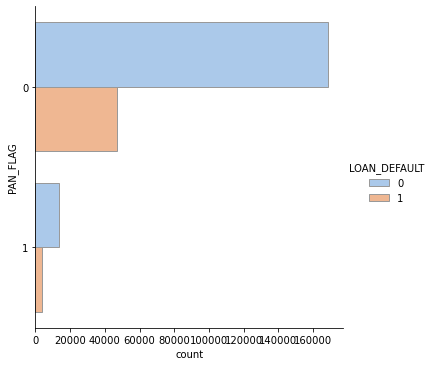

<Figure size 720x3600 with 0 Axes>

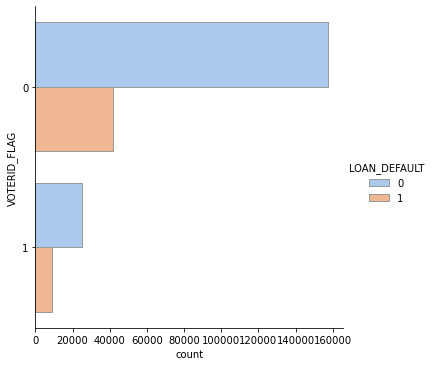

<Figure size 720x3600 with 0 Axes>

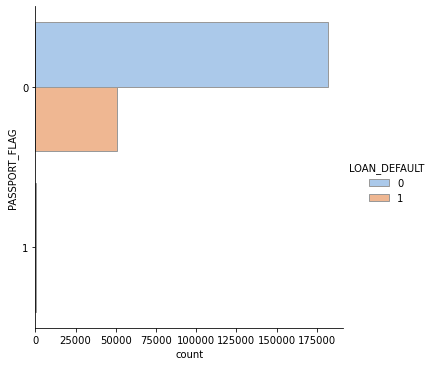

<Figure size 720x3600 with 0 Axes>

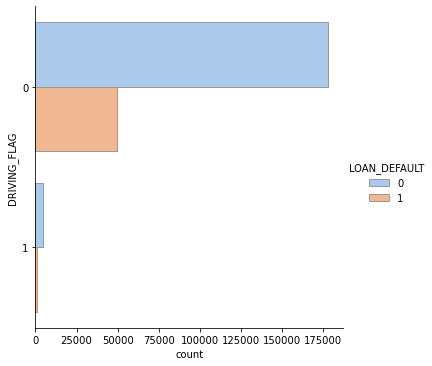

In [228]:
plot_bar("MOBILENO_AVL_FLAG")
plot_bar("AADHAR_FLAG")
plot_bar("PAN_FLAG")
plot_bar("VOTERID_FLAG")
plot_bar("PASSPORT_FLAG")
plot_bar("DRIVING_FLAG")

<Figure size 720x3600 with 0 Axes>

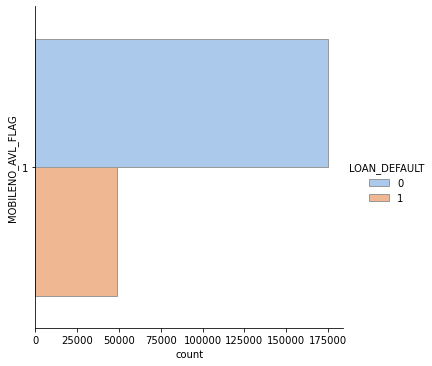

<Figure size 720x3600 with 0 Axes>

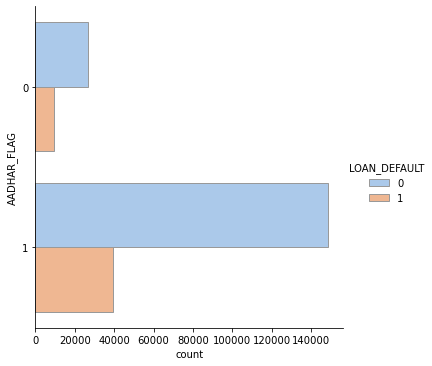

<Figure size 720x3600 with 0 Axes>

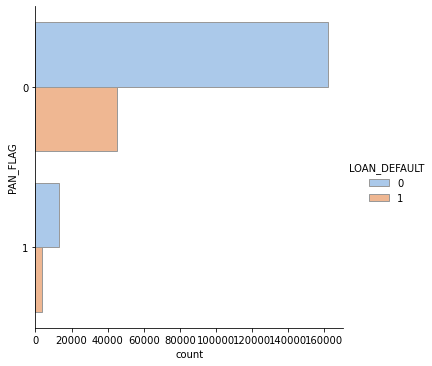

<Figure size 720x3600 with 0 Axes>

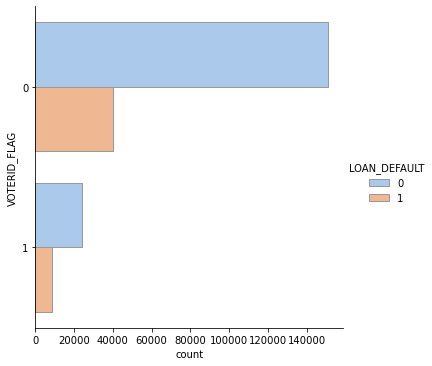

<Figure size 720x3600 with 0 Axes>

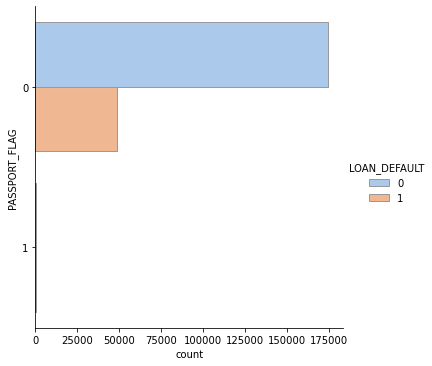

<Figure size 720x3600 with 0 Axes>

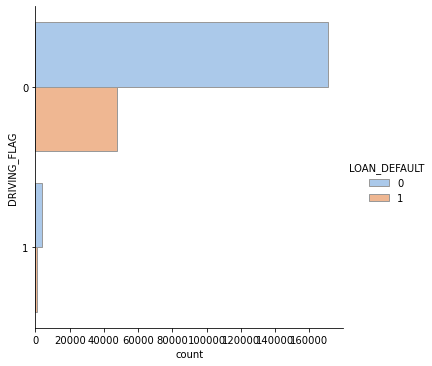

In [229]:
plot_bar1("MOBILENO_AVL_FLAG")
plot_bar1("AADHAR_FLAG")
plot_bar1("PAN_FLAG")
plot_bar1("VOTERID_FLAG")
plot_bar1("PASSPORT_FLAG")
plot_bar1("DRIVING_FLAG")

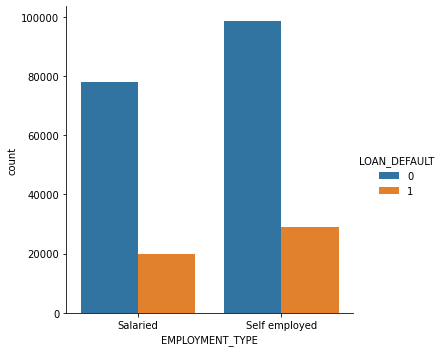

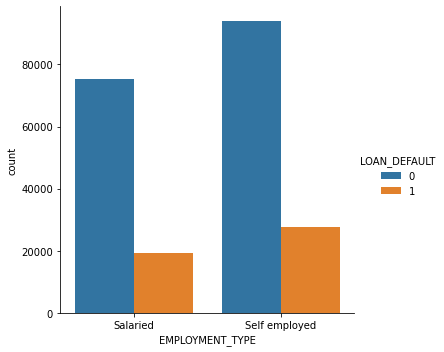

In [230]:
sns.catplot(data=train_plot,kind='count',x='EMPLOYMENT_TYPE',hue='LOAN_DEFAULT')
sns.catplot(data=train_cleaned,kind='count',x='EMPLOYMENT_TYPE',hue='LOAN_DEFAULT')

In [231]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import datetime

print ("Modules are imported")

Modules are imported


In [232]:
train_cleaned.describe()

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,STATE_ID,EMPLOYEE_CODE_ID,...,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,NO_OF_INQUIRIES,LOAN_DEFAULT
count,223843.000000,223843.000000,223843.000000,223843.000000,223843.000000,223843.000000,223843.000000,223843.000000,223843.000000,223843.000000,...,223843.000000,2.238430e+05,2.238430e+05,2.238430e+05,2.238430e+05,2.238430e+05,223843.000000,223843.000000,223843.000000,223843.000000
mean,535827.753827,53840.712794,74486.792819,75.125556,72.822349,19621.362517,69.097090,3379.819123,7.263296,1546.490616,...,0.006924,5.247705e+03,7.046501e+03,6.933154e+03,8.962704e+03,2.965710e+02,0.346462,0.082799,0.199466,0.217519
std,68338.516202,11202.400071,14734.316771,10.909946,69.822102,3484.813281,22.220788,2239.174350,4.493767,975.297276,...,0.106634,1.717270e+05,1.839588e+05,1.834372e+05,9.769062e+04,1.485238e+04,0.849779,0.322808,0.694073,0.412559
min,417428.000000,14119.000000,37000.000000,34.650000,1.000000,10524.000000,45.000000,1.000000,1.000000,1.000000,...,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,476652.500000,47103.000000,65610.500000,69.320000,14.000000,16528.000000,48.000000,1510.000000,4.000000,708.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,535784.000000,53629.000000,70732.000000,77.030000,61.000000,20292.000000,86.000000,2956.000000,6.000000,1446.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,595048.000000,60013.000000,78581.000000,83.740000,130.000000,22995.000000,86.000000,5667.000000,10.000000,2357.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.760000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,671084.000000,99363.000000,142151.000000,95.000000,261.000000,24803.000000,145.000000,7345.000000,22.000000,3795.000000,...,7.000000,3.603285e+07,3.000000e+07,3.000000e+07,2.564281e+07,4.170901e+06,20.000000,8.000000,36.000000,1.000000


In [233]:
#loading the training data
data = pd.read_csv("C:/Users/HP/Desktop/Minor Project/train_cleaned.csv")

In [234]:
#Shape of dataframe
print(" Shape of training dataframe: ", data.shape)
data.head(10)
print("Names of columns ", list(data.columns))
data.info()

 Shape of training dataframe:  (223843, 30)
Names of columns  ['DISBURSED_AMOUNT', 'ASSET_COST', 'LTV', 'AADHAR_FLAG', 'PAN_FLAG', 'VOTERID_FLAG', 'DRIVING_FLAG', 'PASSPORT_FLAG', 'PRI_NO_OF_ACCTS', 'PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE', 'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS', 'SEC_OVERDUE_ACCTS', 'SEC_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT', 'NEW_ACCTS_IN_LAST_SIX_MONTHS', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'NO_OF_INQUIRIES', 'LOAN_DEFAULT', 'AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH', 'EMPLOYMENT_TYPE_Salaried', 'PERFORM_CNS_SCORE_DESCRIPTION_High', 'PERFORM_CNS_SCORE_DESCRIPTION_Medium', 'PERFORM_CNS_SCORE_DESCRIPTION_Not Scored', 'PERFORM_CNS_SCORE_DESCRIPTION_Very High', 'AGE', 'DISBURSAL_TIME']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223843 entries, 0 to 223842
Data columns (total 30 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   

In [235]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [236]:
x = data.drop('LOAN_DEFAULT', axis=1)
y = data['LOAN_DEFAULT']
x.shape

(223843, 29)

In [237]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

#LOGISTIC REGRESSION
logmodel = LogisticRegression() 
logmodel.fit(x_train,y_train) # Train Model
logpred = logmodel.predict(x_test) #Predict on Test Set
print(confusion_matrix(y_test, logpred))
print(round(accuracy_score(y_test, logpred),2)*100)

[[52705     2]
 [14446     0]]
78.0


In [238]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
print("Accuracy of model ",accuracy_score(y_test, logpred))
print("F1 Score ",f1_score(y_test, logpred))
print("Recall Score ",recall_score(y_test, logpred))
print("Precision Score ",precision_score(y_test, logpred))

Accuracy of model  0.7848495227316724
F1 Score  0.0
Recall Score  0.0
Precision Score  0.0


In [239]:
#NAIVE BAYESIAN 

from sklearn.naive_bayes import GaussianNB

# train model
nb = GaussianNB().fit(x_train, y_train)

# predict on test set
nb_pred = nb.predict(x_test)
print(confusion_matrix(y_test, nb_pred))
print(round(accuracy_score(y_test, nb_pred),2)*100)

[[52533   174]
 [14419    27]]
78.0


In [240]:
print("Accuracy of model ",accuracy_score(y_test, nb_pred))
print("F1 Score ",f1_score(y_test, nb_pred))
print("Recall Score ",recall_score(y_test, nb_pred))
print("Precision Score ",precision_score(y_test, nb_pred))

Accuracy of model  0.7826902744479025
F1 Score  0.0036867617942240726
Recall Score  0.0018690294891319397
Precision Score  0.13432835820895522


In [241]:
# DECISION TREE CLASSIFIER

from sklearn.tree import DecisionTreeClassifier

# train model
dtree = DecisionTreeClassifier(criterion="entropy",max_depth = 3, random_state= 101, max_features =None , min_samples_leaf = 30).fit(x_train, y_train)

# predict on test set
dtree_pred = dtree.predict(x_test)
print(confusion_matrix(y_test, dtree_pred))
print(round(accuracy_score(y_test, dtree_pred),2)*100)

[[52707     0]
 [14446     0]]
78.0


In [242]:
print("Accuracy of model ",accuracy_score(y_test, dtree_pred))
print("F1 Score ",f1_score(y_test, dtree_pred))
print("Recall Score ",recall_score(y_test, dtree_pred))
print("Precision Score ",precision_score(y_test, dtree_pred))

Accuracy of model  0.784879305466621
F1 Score  0.0
Recall Score  0.0
Precision Score  0.0


C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


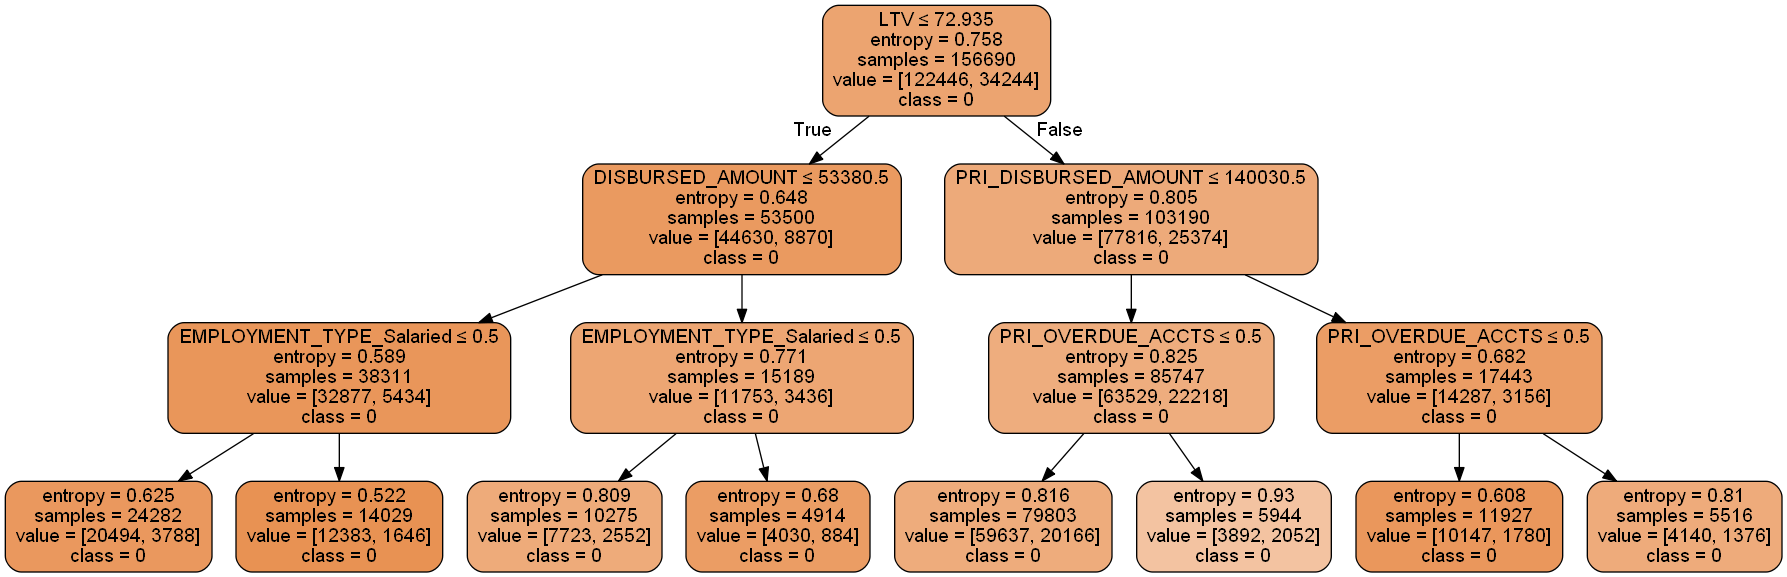

In [243]:
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
feature_cols = ['DISBURSED_AMOUNT', 'ASSET_COST', 'LTV', 'AADHAR_FLAG', 'PAN_FLAG', 'VOTERID_FLAG', 'DRIVING_FLAG', 'PASSPORT_FLAG', 'PRI_NO_OF_ACCTS', 'PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE', 'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS', 'SEC_OVERDUE_ACCTS', 'SEC_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT', 'NEW_ACCTS_IN_LAST_SIX_MONTHS', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'NO_OF_INQUIRIES',  'AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH', 'EMPLOYMENT_TYPE_Salaried', 'PERFORM_CNS_SCORE_DESCRIPTION_High', 'PERFORM_CNS_SCORE_DESCRIPTION_Medium', 'PERFORM_CNS_SCORE_DESCRIPTION_Not Scored', 'PERFORM_CNS_SCORE_DESCRIPTION_Very High', 'AGE', 'DISBURSAL_TIME']
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('loan default.png')
Image(graph.create_png())

In [244]:
#Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

# train model
rfc = RandomForestClassifier(n_estimators=10).fit(x_train, y_train)

# predict on test set
rfc_pred = rfc.predict(x_test)
print(confusion_matrix(y_test, rfc_pred))
print(round(accuracy_score(y_test, rfc_pred),2)*100)

[[50201  2506]
 [13373  1073]]
76.0


In [245]:
print("Accuracy of model ",accuracy_score(y_test, rfc_pred))
print("F1 Score ",f1_score(y_test, rfc_pred))
print("Recall Score ",recall_score(y_test, rfc_pred))
print("Precision Score ",precision_score(y_test, rfc_pred))

Accuracy of model  0.7635399758759847
F1 Score  0.11905686546463243
Recall Score  0.07427661636439152
Precision Score  0.29980441464096114


In [246]:
#SMOTE - Dealing with Imbalanced Class

from imblearn.over_sampling import SMOTE


# setting up testing and training sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=27)

sm = SMOTE(random_state=27)
x_train, y_train = sm.fit_sample(x_train, y_train)

In [247]:
#Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

# train model
dtree = DecisionTreeClassifier(max_depth = 10, random_state= 101, max_features =None , min_samples_leaf = 30).fit(x_train, y_train)

# predict on test set
dtree_pred = dtree.predict(x_test)
print(confusion_matrix(y_test, dtree_pred))
print(round(accuracy_score(y_test, dtree_pred),2)*100)

[[39951 12534]
 [10218  4450]]
66.0


In [248]:
print("Accuracy of model ",accuracy_score(y_test, dtree_pred))
print("F1 Score ",f1_score(y_test, dtree_pred))
print("Recall Score ",recall_score(y_test, dtree_pred))
print("Precision Score ",precision_score(y_test, dtree_pred))

Accuracy of model  0.6611916072252915
F1 Score  0.2811828636421079
Recall Score  0.303381510771748
Precision Score  0.26201130475741874


In [249]:
#LOGISTIC REGRESSION
logmodel = LogisticRegression() 
logmodel.fit(x_train,y_train) # Train Model
logpred = logmodel.predict(x_test) #Predict on Test Set
print(confusion_matrix(y_test, logpred))
print(round(accuracy_score(y_test, logpred),2)*100)

[[22421 30064]
 [ 4378 10290]]
49.0


In [250]:
print("Accuracy of model ",accuracy_score(y_test, logpred))
print("F1 Score ",f1_score(y_test, logpred))
print("Recall Score ",recall_score(y_test, logpred))
print("Precision Score ",precision_score(y_test, logpred))

Accuracy of model  0.48711152145101483
F1 Score  0.3740322052996983
Recall Score  0.7015271338969185
Precision Score  0.25499330921346086


In [251]:
#NAIVE BAYESIAN 

from sklearn.naive_bayes import GaussianNB

# train model
nb = GaussianNB().fit(x_train, y_train)

# predict on test set
nb_pred = nb.predict(x_test)
print(confusion_matrix(y_test, nb_pred))
print(round(accuracy_score(y_test, nb_pred),2)*100)

[[ 2926 49559]
 [  431 14237]]
26.0


In [252]:
print("Accuracy of model ",accuracy_score(y_test, nb_pred))
print("F1 Score ",f1_score(y_test, nb_pred))
print("Recall Score ",recall_score(y_test, nb_pred))
print("Precision Score ",precision_score(y_test, nb_pred))

Accuracy of model  0.2555805399609846
F1 Score  0.3628925367047309
Recall Score  0.9706163076083992
Precision Score  0.22316446172173804


In [253]:
#Random Forest Classification

# train model
rfc = RandomForestClassifier(n_estimators=10).fit(x_train, y_train)

# predict on test set
rfc_pred = rfc.predict(x_test)
print(confusion_matrix(y_test, rfc_pred))
print(round(accuracy_score(y_test, rfc_pred),2)*100)

print("Accuracy of model ",accuracy_score(y_test, rfc_pred))
print("F1 Score ",f1_score(y_test, rfc_pred))
print("Recall Score ",recall_score(y_test, rfc_pred))
print("Precision Score ",precision_score(y_test, rfc_pred))

[[43417  9068]
 [11340  3328]]
70.0
Accuracy of model  0.6960969725849925
F1 Score  0.24593556015370974
Recall Score  0.22688846468502863
Precision Score  0.26847370119393354


In [254]:
#Downsampling - Dealing with Imbalanced Class

x = data.drop('LOAN_DEFAULT', axis=1)
y = data['LOAN_DEFAULT']
x.shape

(223843, 29)

In [255]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

from sklearn.utils import resample
# concatenate our training data back together
x = pd.concat([x_train, y_train], axis=1)

# separate minority and majority classes
not_fraud = x[x.LOAN_DEFAULT==0]
fraud = x[x.LOAN_DEFAULT==1]

# downsample majority
not_fraud_downsampled = resample(not_fraud,
                                replace = False, # sample without replacement
                                n_samples = len(fraud), # match minority n
                                random_state = 27) # reproducible results

# combine minority and downsampled majority
downsampled = pd.concat([not_fraud_downsampled, fraud])

# checking counts
downsampled.LOAN_DEFAULT.value_counts()

y_train = downsampled.LOAN_DEFAULT
x_train = downsampled.drop('LOAN_DEFAULT', axis=1)

In [256]:
#Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

# train model
dtree = DecisionTreeClassifier(max_depth = 10, random_state= 101, max_features =None , min_samples_leaf = 30).fit(x_train, y_train)

# predict on test set
dtree_pred = dtree.predict(x_test)
print(confusion_matrix(y_test, dtree_pred))
print(round(accuracy_score(y_test, dtree_pred),2)*100)

[[29593 23114]
 [ 5922  8524]]
56.99999999999999


In [257]:
print("Accuracy of model ",accuracy_score(y_test, dtree_pred))
print("F1 Score ",f1_score(y_test, dtree_pred))
print("Recall Score ",recall_score(y_test, dtree_pred))
print("Precision Score ",precision_score(y_test, dtree_pred))

Accuracy of model  0.5676142540169464
F1 Score  0.36993316552382605
Recall Score  0.5900595320503945
Precision Score  0.26942284594474997


In [258]:
#LOGISTIC REGRESSION
logmodel = LogisticRegression() 
logmodel.fit(x_train,y_train) # Train Model
logpred = logmodel.predict(x_test) #Predict on Test Set
print(confusion_matrix(y_test, logpred))
print(round(accuracy_score(y_test, logpred),2)*100)

[[22003 30704]
 [ 4426 10020]]
48.0


In [259]:
print("Accuracy of model ",accuracy_score(y_test, logpred))
print("F1 Score ",f1_score(y_test, logpred))
print("Recall Score ",recall_score(y_test, logpred))
print("Precision Score ",precision_score(y_test, logpred))

Accuracy of model  0.4768662606287135
F1 Score  0.36324089178901575
Recall Score  0.6936176104111865
Precision Score  0.2460465573126412


In [260]:
#NAIVE BAYESIAN 

from sklearn.naive_bayes import GaussianNB

# train model

nb = GaussianNB().fit(x_train, y_train)

# predict on test set
nb_pred = nb.predict(x_test)
print(confusion_matrix(y_test, nb_pred))
print(round(accuracy_score(y_test, nb_pred),2)*100)

[[48148  4559]
 [12920  1526]]
74.0


In [261]:
print("Accuracy of model ",accuracy_score(y_test, nb_pred))
print("F1 Score ",f1_score(y_test, nb_pred))
print("Recall Score "
      ,recall_score(y_test, nb_pred))
print("Precision Score ",precision_score(y_test, nb_pred))

Accuracy of model  0.7397137879171445
F1 Score  0.14865325605182408
Recall Score  0.10563477779316073
Precision Score  0.25078060805258834


In [262]:
#Random Forest Classification

# train model
rfc = RandomForestClassifier(n_estimators=10).fit(x_train, y_train)

# predict on test set
rfc_pred = rfc.predict(x_test)
print(confusion_matrix(y_test, rfc_pred))
print(round(accuracy_score(y_test, rfc_pred),2)*100)

print("Accuracy of model ",accuracy_score(y_test, rfc_pred))
print("F1 Score ",f1_score(y_test, rfc_pred))
print("Recall Score ",recall_score(y_test, rfc_pred))
print("Precision Score ",precision_score(y_test, rfc_pred))

[[33599 19108]
 [ 7736  6710]]
60.0
Accuracy of model  0.6002561315205576
F1 Score  0.33330021855752034
Recall Score  0.4644884397064932
Precision Score  0.25989619645208767


In [263]:
downsampled.LOAN_DEFAULT.value_counts()

1    34244
0    34244
Name: LOAN_DEFAULT, dtype: int64